# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [303]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

In [304]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab 
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


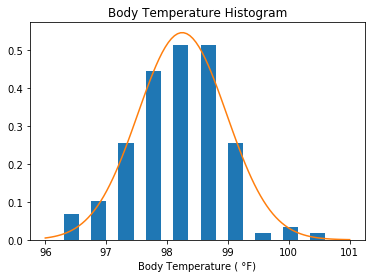

In [305]:
# An informal approach to testing normality is to compare a histogram of the sample data to a normal probability curve.
# Plot histogram
plt.hist(df.temperature, width=0.25, normed=True) # set normed true because we are comparing to a pdf
plt.xlabel('Body Temperature ( °F)')
plt.title('Body Temperature Histogram')

# Overlay plot of normal distribution
x = np.linspace(96, 101, 100)
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)
pdf = stats.norm.pdf(x, temp_mean, temp_std)
plt.plot(x, pdf) 
plt.show()

# The empirical distribution of the data (the histogram) is bell-shaped and resembles the normal distribution.

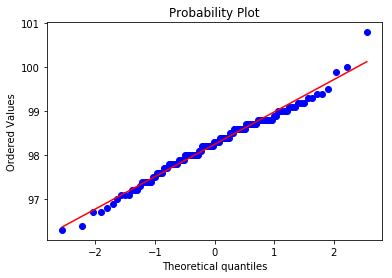

In [306]:
# A graphical tool for assessing normality is the normal probability plot, a quantile-quantile plot (QQ plot) 
# ... of the standardized data against the standard normal distribution
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

In [307]:
# Null hypothesis: a sample comes from a normal distribution
# Alternative hypothesis: the data is not following a normal distribution
# alpha (significance level) = 0.05
normal_test = stats.mstats.normaltest(df.temperature) 
#print('Normality test z-statistic: ' + str(round(normal_test[0], 3)) + '\n' 
#      + 'p-value: ' + str(round(normal_test[1], 3)))

print('z-statistic = %6.3f   p-value = %6.4f' % (normal_test[0], normal_test[1]))
# p-value > alpha, therefore we fail to reject the null hypothesis 

z-statistic =  2.704   p-value = 0.2587


### 2. Is the sample size large? Are the observations independent?

In [308]:
temp_size = df.temperature.size
print('Temperature samples: ' + str(temp_size))

Temperature samples: 130


The sample size is 130, which is greater than the 30 (a requirement of the central limit theorem). We also assume that the observations are independent because reading a patient's body temperature is generally not known to affect another person's temperature reading. Therefore, we may use the central limit theorem.

### 3. Is the true population mean really 98.6 degrees F?


#### 3.1. First, try a bootstrap hypothesis test.

Here we will use the population mean as our test statistic. 

H_0: μ = 98.6 degrees F

H_1: μ ≠ 98.6 degrees F

α = 0.05

In [309]:
# Bootstapping requires boot strap samples and then calculating the bootstrap replicates
def bootstrap_replicate_1d(data, func):
    """Generate a single bootstrap replicate."""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

pop_temp = 98.6

# Make an array of translated temperatures to the population: translated_temp
translated_temp = df.temperature + (pop_temp - np.mean(df.temperature))

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p_val = np.sum(bs_replicates <= temp_mean) / 10000

print('p-value = %.5f' % (p_val))

# p < α, therefore we reject the null hypothesis, H_0: μ = 98.6 deg F, 
# ... in favor of the alternate hypothesis, H_1: μ ≠ 98.6 deg. F


p-value = 0.00000


#### 3.2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the  t  or  z  statistic?

We use a one-sample test because we are comparing a sample mean to a population mean. We are not interested in comparing a one sample mean to another sample mean, i.e. a two-sample test. In this situation is it appropriate to use a t-statistic as the test statistic. We meet the requirement of at least 30 samples for a z-test, however we are only given the population mean of 98.6 without a population standard deviation so a z-test cannot be used.

H_0: μ = 98.6 degrees F

H_1: μ ≠ 98.6 degrees F

α = 0.05


In [310]:
# Calculate the t-statistic and its associated p-value
n = len(df.temperature)
std_error = temp_std/np.sqrt(n)
t_statistic = (temp_mean - pop_temp)/std_error
p_val = stats.t.sf(np.abs(t_statistic), n-1)*2 # two-sided p-value with n-1 degrees of freedom
print('t-statistic = %.5f   p-value = %.8f' % (t_statistic, p_val))

t-statistic = -5.47593   p-value = 0.00000022


#### 3.3. Now try using the other test. How is the result be different? Why?

The resulting t-statistic, z-statistic and p-values are extremely close to one another. As the number of samples increases, the t-distribution will approach the normal z-distribution.

In [311]:
# Calculate the z-statistic and its associated p-value
z_statistic = (temp_mean - pop_temp)/std_error
p_val = stats.norm.sf(np.abs(z_statistic))*2 # two-sided p-value
print('z-statistic = %.5f   p-value = %.8f' % (z_statistic, p_val))

z-statistic = -5.47593   p-value = 0.00000004


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [312]:
# Calculate the t-statistic and its associated p-value with n = 10
n_small = 10
std_error = temp_std/np.sqrt(n_small)
t_statistic = (temp_mean - pop_temp)/std_error
p_val = stats.t.sf(np.abs(t_statistic), n_small-1)*2 # two-sided p-value with n-1 degrees of freedom
print('t-statistic = %.5f   p-value = %.8f' % (t_statistic, p_val))

t-statistic = -1.51875   p-value = 0.16314214


In [313]:
# Calculate the z-statistic and its associated p-value
z_statistic = (temp_mean - pop_temp)/std_error
p_val = stats.norm.sf(np.abs(z_statistic))*2 # two-sided p-value
print('z-statistic = %.5f   p-value = %.8f' % (z_statistic, p_val))

z-statistic = -1.51875   p-value = 0.12882584


#### 4.1. Which one is the correct one to use?

It is better to use a t-test in this particular problem because our sample size is less than 30 (n = 10) and the population standard is not known. The z-test is best used for greater than 30 samples because, under the central limit theorem, as the number of samples gets larger, the samples are considered to be approximately normally distributed.


#### 4.2. What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

The p-value is lower for the z-statistic, which may lead to a type I error (false positive), which is typically more undesirable in practice compared to a type II error, e.g. a drug that doesn't actually cure the disease even though the tests show statistical significance.

Also, t-tests because of the central limit theorem, many test statistics are approximately normally distributed for large samples. For each significance level, the Z-test has a single critical value (for example, 1.96 for 5% two tailed) which makes it more convenient than the Student's t-test which has separate critical values for each sample size.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### 5.1. As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. The confidence interval using both approaches informs us that the true mean temperature shall fall between 97.80 and 98.7 using the frequentist approach, while the bootstrap approach is between 98.48 and 98.725. The boot strap method seems to provide a narrow range compared to the frequentist approach. The two frequentist approaches (z-distribution and t-distribution) provide near identical results.

In [314]:
# Bootstrap approach: 95% confidence interval
# Bootstrapping allows us to take percentiles of the bootstrap replicates to get the confidence interval
bootstrap_CI_95 = np.percentile(bs_replicates,[2.5,97.5])
bootstrap_CI_95 = [round(bootstrap_CI_95[0],3), round(bootstrap_CI_95[1],3)]
print('95% Confidence Interval: ' + str(bootstrap_CI_95))

95% Confidence Interval: [98.476, 98.725]


In [315]:
# Frequentist approach with normal z-distribution: 95% confidence interval
Z = 1.96
freq_ztest_CI_95 = [round(temp_mean - Z*std_error,3), round(temp_mean + Z*std_error,3)]
print('95% Confidence Interval: ' + str(freq_ztest_CI_95))

95% Confidence Interval: [97.797, 98.702]


In [316]:
# Frequentist approach with t-distribution: 95% confidence interval
crit = stats.t.isf([0.025], n-1)
freq_ttest_CI_95 = [round(temp_mean - crit[0]*std_error, 3), round(temp_mean + crit[0]*std_error, 3)]
print('95% Confidence Interval: ' + str(freq_ttest_CI_95))

95% Confidence Interval: [97.792, 98.706]


### 6. Is there a significant difference between males and females in normal temperature?


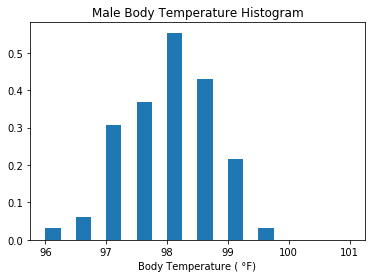

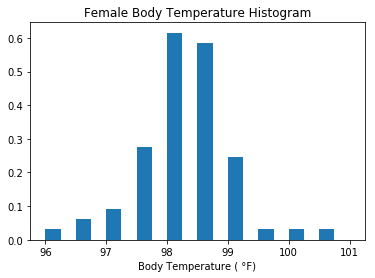

In [321]:
# Perform EDA before hypothesis testing

# Create male dataframe
male_df = df.loc[df.gender == 'M']

# Plot histogram
plt.hist(male_df.temperature, width=0.25, normed=True, range=[96, 101]) # set normed true because we are comparing to a pdf
plt.xlabel('Body Temperature ( °F)')
plt.title('Male Body Temperature Histogram')
plt.show()

# Create female dataframe
female_df = df.loc[df.gender == 'F']

# Plot histogram
plt.hist(female_df.temperature, width=0.25, normed=True, range=[96, 101]) # set normed true because we are comparing to a pdf
plt.xlabel('Body Temperature ( °F)')
plt.title('Female Body Temperature Histogram')
plt.show()


#### 6.1. What testing approach did you use and why?

We will use both the bootstrap and the frequentist approach (Student's T-test) to evaluate statistical significance between the difference in male and female body mean temperature. 

H_0: male μ = female μ

H_1: male μ ≠ female μ

α = 0.05

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [318]:
# Perform a two-sample bootstrap hypothesis test
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Empirical difference in means of the two samples
empirical_diff_means = diff_of_means(female_df.temperature, male_df.temperature)

# Generate shifted arrays
male_shifted = male_df.temperature - np.mean(male_df.temperature) + temp_mean
female_shifted = female_df.temperature - np.mean(female_df.temperature) + temp_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_reps(male_shifted, np.mean, size=10000)
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.01


In [319]:
# Perform a two-sample t-test hypothesis test
male_temp_std = male_df.temperature.std()
female_temp_std = female_df.temperature.std()

male_n = len(male_df)
female_n = len(female_df)

std_error = np.sqrt(np.square(male_temp_std)/male_n + np.square(female_temp_std)/female_n)
t_statistic = (empirical_diff_means)/std_error
p_val = stats.t.sf(np.abs(t_statistic), n-1)*2 # two-sided p-value with n-1 degrees of freedom
print('t-statistic = %.3f   p-value = %.4f' % (t_statistic, p_val))

t-statistic = 2.285   p-value = 0.0239


Both the two-sample bootstrap and t-test hypothesis test show that we must reject the null hypothesis, male μ = female μ, in favor of the alternate hypothesis, male μ ≠ female μ. 

#### 6.2. Write a story with your conclusion in the context of the original problem.

The generally accepted mean body temperature is 98.6∘F. In our analysis we have shown that there is high statistical significance that the true population mean is not 98.6∘F. We used two techniques: resampling methods (bootstrapping) and frequentist statistics (z and t-tests). For bootstrapping, we calculated a p-value of of 0.0005. The t-statistic and z-statistic was -5.47593 with a p-value of 0.00000022 and -5.47593 with a p-value of 0.00000004, respectively.

We have also shown that there is statistically significant difference in men and women mean body temperature. For bootstrapping we calculated a p-value of of 0.012. Using frequentist statistics, we calculated a t-statistic of 2.285 with a p-value of 0.023. Although there is statistical significance for the significance level typically used in biological research (α = 0.05), this study could use more stringent significance levels perhaps at 0.01. With a 0.01 significance level, both the bootstrapping and t-tests fail the reject the null hypothesis. Lowering the significance level will avoid unecessary false positives. Also, even if women have higher core temperatures, it would be interesting to evaluate if there is also a difference in men and women in terms of mean extremity (e.g. feet, hands, etc.) temperature. Organizations may use this study to improve products and services targeted to men and women where body temperature is important, e.g. clothing. 